In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('daywiseRNN.csv',index_col='Transdate',parse_dates=True)
df.asfreq='DS'

In [ ]:
df.head()

,NetAmount
Transdate,
2021-07-01,30075318.98
2021-07-02,9560455.00
2021-07-03,44738056.52
2021-07-04,32406101.87
2021-07-05,25945143.64


In [ ]:
df.shape

(788, 1)

<Axes: xlabel='Transdate'>

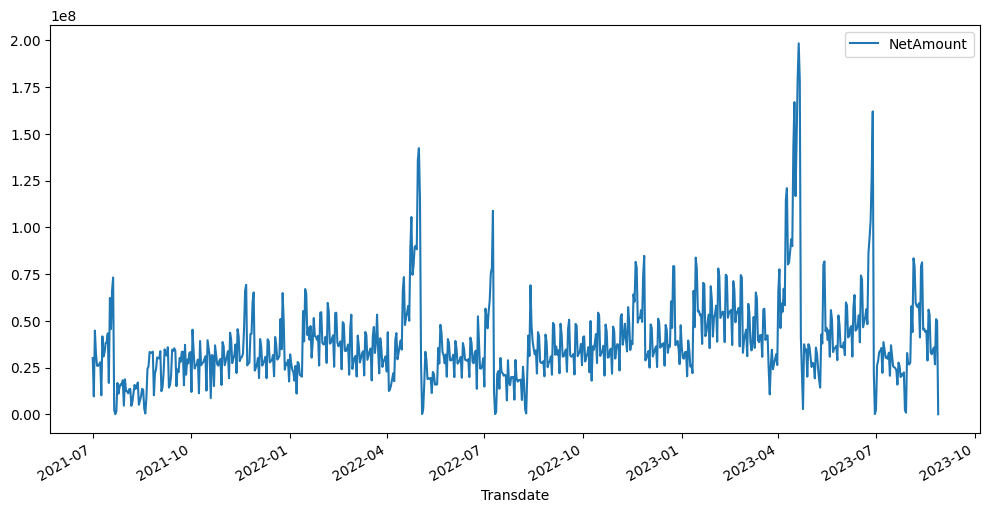

In [ ]:

df.plot(figsize=(12,6))


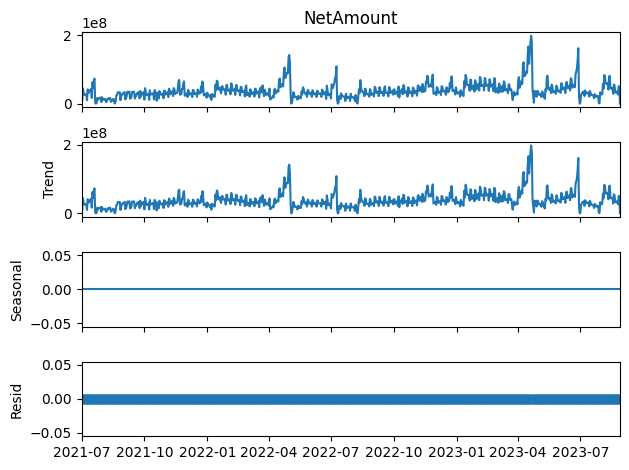

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(
df['NetAmount'], model='additive',extrapolate_trend='freq', period=1)

decomposition.plot()
plt.show()

In [ ]:
len(df)

788

In [ ]:

train = df.iloc[:630]
test = df.iloc[630:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head() , df.tail()

(              NetAmount
 Transdate              
 2021-07-01  30075318.98
 2021-07-02   9560455.00
 2021-07-03  44738056.52
 2021-07-04  32406101.87
 2021-07-05  25945143.64,
               NetAmount
 Transdate              
 2023-08-24  35731204.22
 2023-08-25  26713032.94
 2023-08-26  50870836.70
 2023-08-27  49895861.03
 2023-08-28     10490.98)

In [ ]:

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:

scaled_train[:10]


array([[0.21088908],
       [0.066725  ],
       [0.31392852],
       [0.22726819],
       [0.1818651 ],
       [0.18157441],
       [0.18746109],
       [0.19493032],
       [0.07077354],
       [0.29251451]])

In [ ]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.21088908 0.066725   0.31392852]
Predict this y: 
 [[0.22726819]]


In [ ]:
X.shape


(1, 3, 1)

In [ ]:
n_input = 29
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [ ]:


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=10000)


Epoch 1/10000
601/601 [==============================] - 11s 15ms/step - loss: 0.0129
Epoch 2/10000
601/601 [==============================] - 10s 16ms/step - loss: 0.0105
Epoch 3/10000
601/601 [==============================] - 8s 14ms/step - loss: 0.0102
Epoch 4/10000
601/601 [==============================] - 8s 14ms/step - loss: 0.0099
Epoch 5/10000
601/601 [==============================] - 9s 16ms/step - loss: 0.0098
Epoch 6/10000
601/601 [==============================] - 10s 16ms/step - loss: 0.0097
Epoch 7/10000
601/601 [==============================] - 9s 15ms/step - loss: 0.0094
Epoch 8/10000
601/601 [==============================] - 9s 14ms/step - loss: 0.0094
Epoch 9/10000
601/601 [==============================] - 9s 15ms/step - loss: 0.0093
Epoch 10/10000
601/601 [==============================] - 9s 15ms/step - loss: 0.0091
Epoch 11/10000
601/601 [==============================] - 9s 15ms/step - loss: 0.0090
Epoch 12/10000
601/601 [==============================] - 9s

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

NameError: ignored

In [ ]:

last_train_batch = scaled_train[-29:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 27ms/step


array([[0.38963246]], dtype=float32)

In [ ]:

scaled_test[0]

array([0.47152339])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [ ]:
test_predictions

[array([0.38963246], dtype=float32),
 array([0.33429277], dtype=float32),
 array([0.5367993], dtype=float32),
 array([0.56958157], dtype=float32),
 array([0.36166626], dtype=float32),
 array([0.40066826], dtype=float32),
 array([0.44100964], dtype=float32),
 array([0.45777726], dtype=float32),
 array([0.38630712], dtype=float32),
 array([0.606747], dtype=float32),
 array([0.69245416], dtype=float32),
 array([0.36446637], dtype=float32),
 array([0.4011945], dtype=float32),
 array([0.43221086], dtype=float32),
 array([0.44902378], dtype=float32),
 array([0.41234988], dtype=float32),
 array([0.6007361], dtype=float32),
 array([0.71195984], dtype=float32),
 array([0.5422382], dtype=float32),
 array([0.48003602], dtype=float32),
 array([0.49130064], dtype=float32),
 array([0.52228194], dtype=float32),
 array([0.4753399], dtype=float32),
 array([0.6211846], dtype=float32),
 array([0.66618866], dtype=float32),
 array([0.6183772], dtype=float32),
 array([0.5128056], dtype=float32),
 array([0.2

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:

test['Predictions'] = true_predictions

<ipython-input-63-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test.head()

,NetAmount,Predictions
TransDate,,
2023-04-06,6.717291e+07,5.552100e+07
2023-04-07,5.832475e+07,4.764696e+07
2023-04-08,1.147537e+08,7.646073e+07
2023-04-09,1.209508e+08,8.112517e+07
2023-04-10,8.010118e+07,5.154182e+07


<Axes: xlabel='TransDate'>

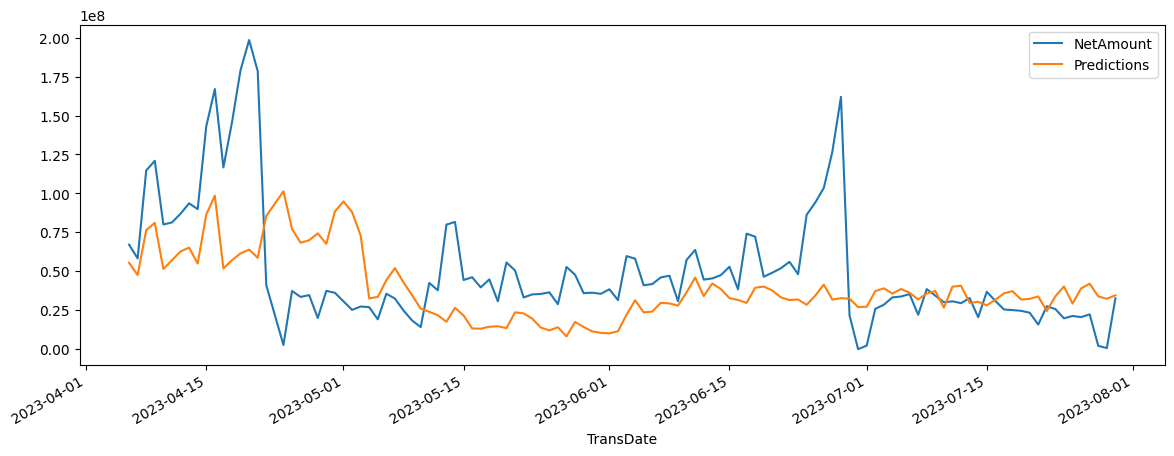

In [ ]:
test.plot(figsize=(14,5))


In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['NetAmount'],test['Predictions']))
print(rmse)


35425341.98101738
